In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Retorna el path del primer archivo .csv dentro de una carpeta detereminada

def get_csv_path(folder_path):
  csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

  file_path = os.path.join(folder_path, csv_files[0])

  return file_path

## Visualizaciones de Pregunta 1

_¿Cuántas medallas de cada tipo (oro, plata, bronce) ha ganado cada país en total?_

In [3]:
df_1 = pd.read_csv(get_csv_path('analytics/1'))

La primera visualizacion para esta pregunta es un __Gráfico de Barras Apiladas__, en donde se muestra para cada país (columna), la cantidad de medallas de oro, plata y bronce obtenidas:

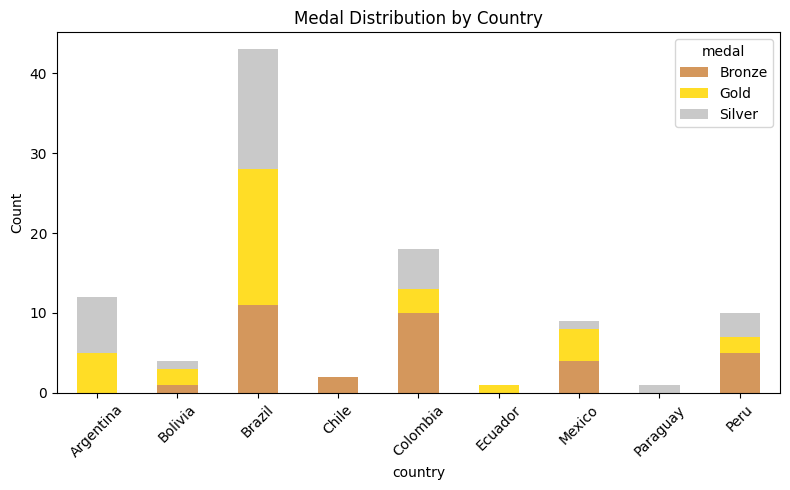

In [4]:
pivot_table = df_1.pivot(index='country', columns='medal', values='count').fillna(0)

colors = {
    "Gold": "gold",
    "Silver": "silver",
    "Bronze": "peru" 
}

pivot_table.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 5),
    title='Medal Distribution by Country', 
    color=[colors[col] for col in pivot_table.columns],
    alpha=0.85
)

plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La segunda visualización consiste de tres __Gráfico de Torta__, donde para cada tipo de medalla (oro, plata, bronce) muestra el porcentaje de las mismas obtenidas para cada país:

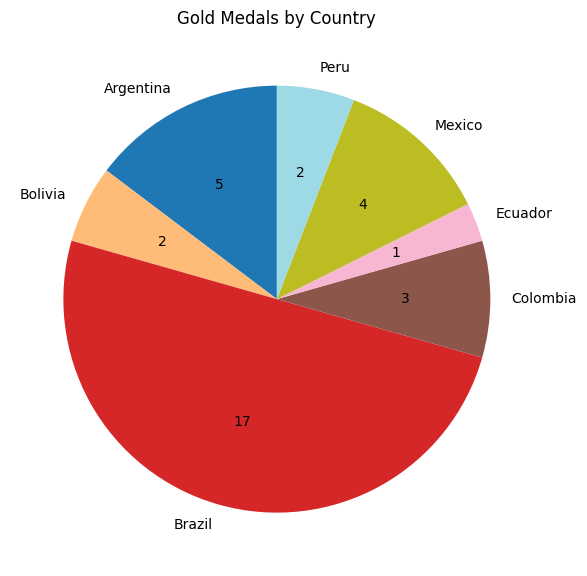

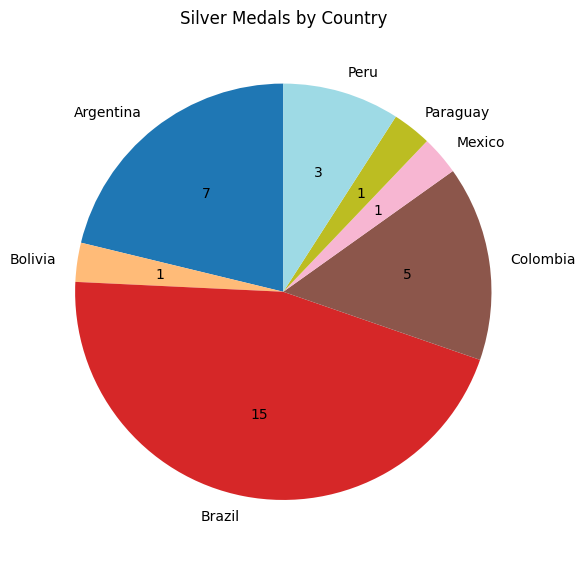

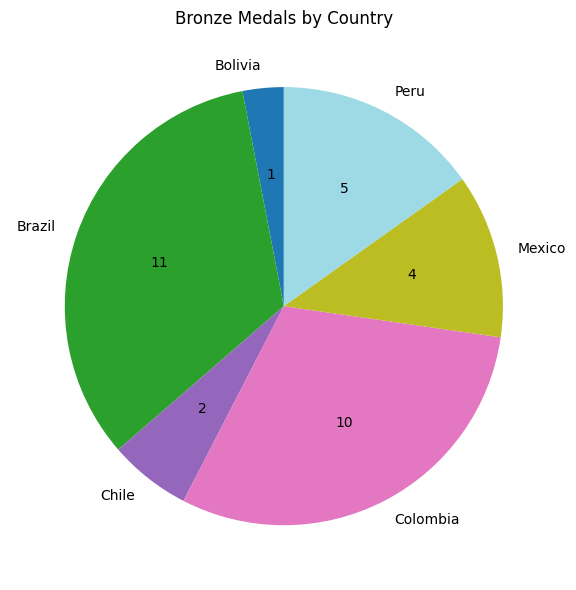

In [5]:
for medal in df_1['medal'].unique():
    medal_data = df_1[df_1['medal'] == medal].set_index('country')['count']
    plt.figure(figsize=(6, 6))
    
    medal_data.plot(
        kind='pie',
        autopct=lambda p: f'{int(round(p * medal_data.sum() / 100))}',
        title=f'{medal} Medals by Country',
        startangle=90,
        cmap='tab20')
    
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

## Visualizaciones de Pregunta 2

_¿Qué eventos tienen el promedio de puntajes más alto en cada disciplina?_

In [6]:
df_2 = pd.read_csv(get_csv_path('analytics/2'))

La primera visualización de esta pregunta consiste en un __Gráfico de Barras Horizontal__, en donde cada barra es una disciplina. 

A su vez, el valor de cada barra está definido como el mejor puntaje promedio obtenido para esa disciplina. Se encuentra acompañada a modo de etiqueta el id del evento en el cual se obtuvo ese mejor puntaje promedio de los atletas que participaron:

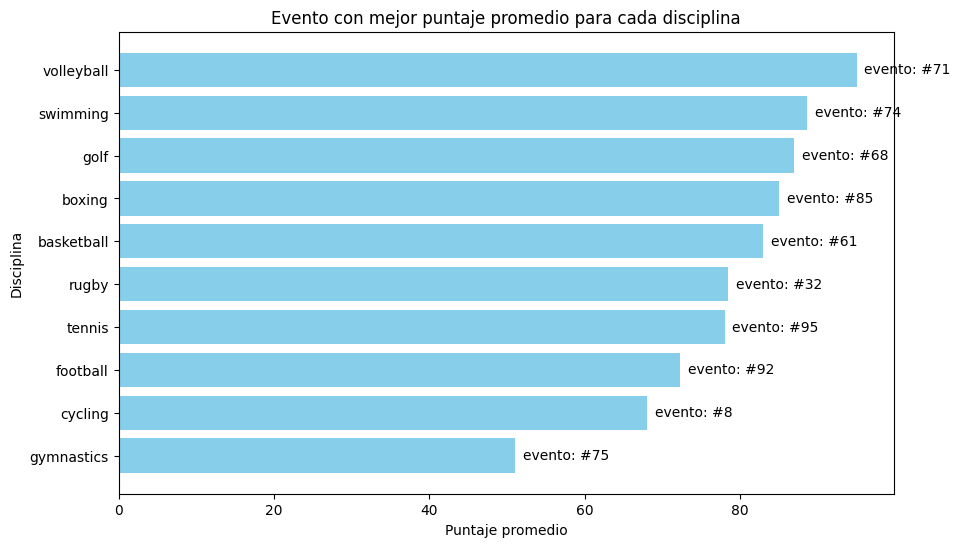

In [7]:
plt.figure(figsize=(10, 6))
df_sorted = df_2.sort_values(by="avg_score", ascending=True)

bars = plt.barh(df_sorted["discipline_name"], df_sorted["avg_score"], color="skyblue")

for bar, event_id in zip(bars, df_sorted["event_id"]):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, str(f"evento: #{event_id}"), va='center')


plt.xlabel("Puntaje promedio")
plt.ylabel("Disciplina")
plt.title("Evento con mejor puntaje promedio para cada disciplina")

plt.show()

Para la segunda visualización, decidí hacer algo un poco más abstracto, dado que con la primera visualización ya se puede visualizar toda la información necesaria para sacar una conclusión sobre qué evento tiene el mejor promedio de puntaje y para qué categoría.

Para esta visualización se ve un __Gráfico de Torta__ que muestra la distribución de los puntajes promedios según si son Altos (80-100), Medios (60-79) o Bajos (40-59). Esta visualización omite la información de los eventos y las disciplinas en sí y opta por obtener un paneo más general de la data.

Este gráfico puede ser útil para entender en primera instancia cómo están siendo los puntajes promedios en general. En caso de que el porcentaje de puntajes bajos sea demasiado alto, quizá sea hora de realizar ajustes en el sistema de medición de puntajes para esas disciiplinas en particular dado que los atletas no están logrando alcanzar el mínimo necesario.

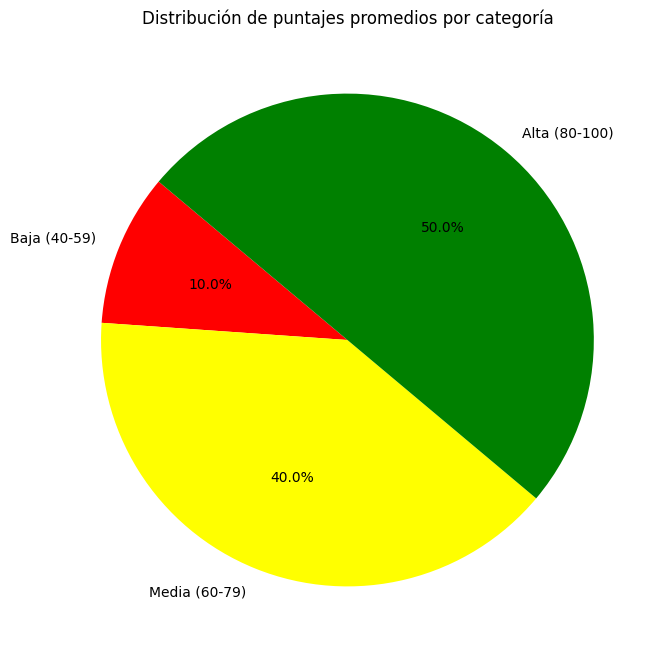

In [8]:
categories = {
    "Baja (40-59)": (40, 59),
    "Media (60-79)": (60, 79),
    "Alta (80-100)": (80, 100)
}

category_counts = {category: df_2[(df_2["avg_score"] > bounds[0]) & (df_2["avg_score"] <= bounds[1])].shape[0] for category, bounds in categories.items()}

plt.figure(figsize=(8, 8))
plt.pie(
  category_counts.values(),
  labels=category_counts.keys(),
  autopct='%1.1f%%',
  startangle=140,
  colors=["red", "yellow", "green"]
)

plt.title("Distribución de puntajes promedios por categoría")
plt.show()

## Visualizaciones de Pregunta 3

_¿Cuál es el atleta con mejor puntaje en cada disciplina?_

In [9]:
df_3 = pd.read_csv(get_csv_path('analytics/3'))

Para la primera visualización, se puede ver un __Gráfico de barras__, en donde para cada disciplina se puede apreciar el valor de su mejor puntaje. A su vez, para cada disciplina se muestra a modo de etiqueta el nombre del atleta que lo consigió:

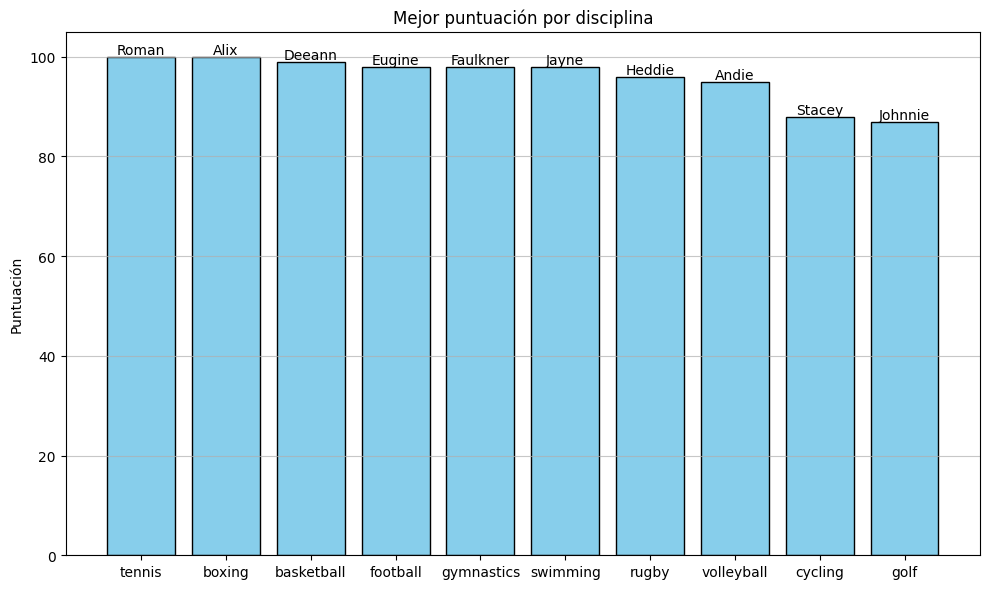

In [10]:
df_3 = df_3.sort_values(by='score', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(df_3['discipline_name'], df_3['score'], color='skyblue', edgecolor='black')

for bar, athlete in zip(bars, df_3['athlete_name']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        athlete, ha='center'
    )

plt.title('Mejor puntuación por disciplina')
plt.ylabel('Puntuación')
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

Para la segunda visualización, se deja de lado los atletas o las disciplinas como tal, y se pasa a visualizar la información en un __Gráfico de barras__ en donde se muestra la frecuencia en la que ocurre cada puntaje:

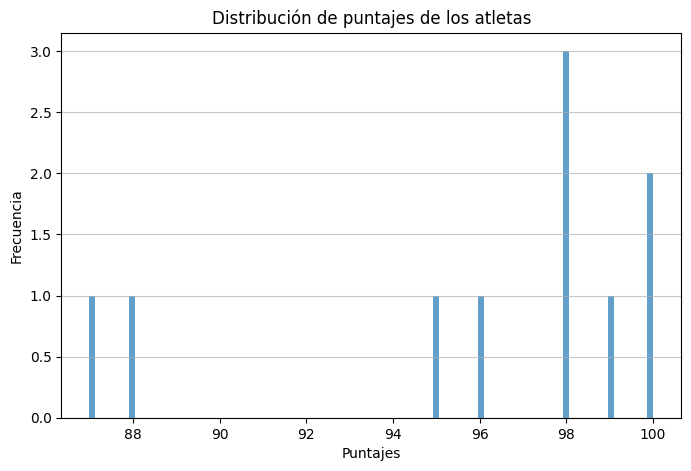

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(df_3["score"], bins=100, alpha=0.7)
plt.title("Distribución de puntajes de los atletas")
plt.xlabel("Puntajes")
plt.ylabel("Frecuencia")
plt.grid(axis="y", alpha=0.7)
plt.show()